## Inversion of synthetic data
### written by Anton Ziegon

<div class="alert alert-info">
<h4>Note:</h4>

In this Notebook the synthetic data which was generated in the previous Notebook (``RM_pygimli_computations.ipynb``) will be inverted.

In [10]:
# Importing pygimli
import  pygimli                 as     pg
import  pygimli.meshtools       as     mt
from    pygimli.physics         import ert
from    pygimli.physics         import TravelTimeManager
from    pygimli.physics         import gravimetry as grav

# Importing auxiliary libraries
import  numpy                   as     np
import  pandas                  as     pd
import  matplotlib.pyplot       as     plt
from    matplotlib.patches      import PathPatch 
import  os

%matplotlib inline

# Setting options
seed_val = 420
np.random.seed(seed_val)
pd.set_option('precision', 2)

### Parameters

In [11]:
# Filenames
fn_mesh    = 'mesh_combinedmodel.poly'
fn_ert_dd  = 'SyntheticData/ert_data_dd.dat'
fn_ert_slm = 'SyntheticData/ert_data_slm.dat'
fn_ert_wa  = 'SyntheticData/ert_data_wa.dat'
fn_tt      = 'SyntheticData/tt_data.dat'

# Limits for ert display
rmin = 5e1
rmax = 1e4 # for displaying true resistivity
ramax = 1e3 # for displaying apparent resistivity

# Limits for tt display
vmin = 500
vmax = 3500

### Load Mesh for comparison

(<AxesSubplot:>, None)

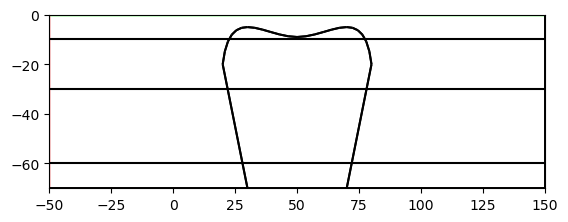

In [42]:
# # Load previous mesh
# geom_mesh = mt.readPLC(fn_mesh)
# pg.show(geom_mesh, fillRegion=False)

# Re-create subsurface geometry for display without mesh
world = mt.createWorld([-50,-70], [150, 0], layers=[-10,-30,-60])
pnts = [[20,-20], [30,-5], [50,-9], [70,-5], [80,-20]]
top = mt.createPolygon(pnts, addNodes=5, interpolate="spline")
left = mt.createLine([30,-70], pnts[0])
right = mt.createLine([70,-70], pnts[-1])
geom = world + top + left + right
pg.show(geom, fillRegion=False)

### ERT Inversion

... of Dipole-Dipole data

13/01/23 - 13:10:00 - pyGIMLi - INFO - Found 2 regions.
13/01/23 - 13:10:00 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/01/23 - 13:10:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/01/23 - 13:10:00 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/01/23 - 13:10:00 - pyGIMLi - INFO - Use median(data values)=349.164173787121
13/01/23 - 13:10:00 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [349.164173787121,...,349.164173787121]
13/01/23 - 13:10:00 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000026498B37950>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000026498B37810>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x0000026498AB4760>
min/max (data): 104/1041
min/max (error): 2.5%/2.81%
min/max (start model): 349/349
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 412.05 (dPhi = 15.59%) lam: 3
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 326.46 (dPhi = 20.77%) lam: 3.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 200.43 (dPhi = 38.6%) lam: 3.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 23.43 (dPhi = 88.27%) lam: 3.0
-------------------------------------

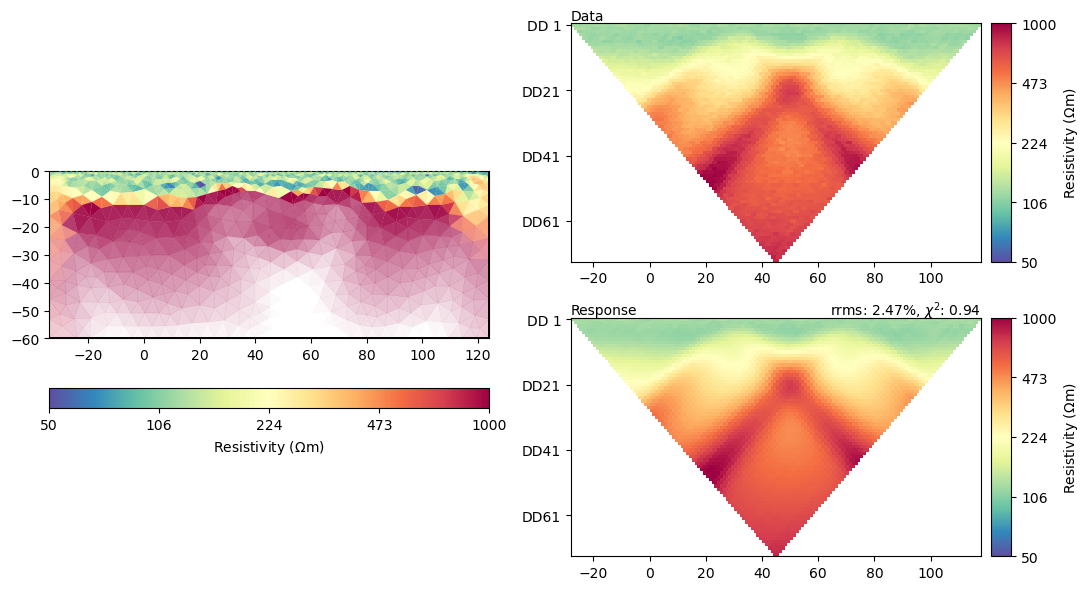

In [13]:
# Loading ERT Manager
mgr_dd = ert.ERTManager(fn_ert_dd)

# Load data
ert_data_dd = ert.load(fn_ert_dd)
#mgr_dd.showData(ert_data_dd)

# Inverting data
inv_dd = mgr_dd.invert(lam=3, zWeight=0.3, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_dd.showResultAndFit(cMin=rmin, cMax=ramax);
plt.savefig('Images/ERT_DD_RF.png')

... of Schlumberger

13/01/23 - 20:17:25 - pyGIMLi - INFO - Found 2 regions.
13/01/23 - 20:17:25 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/01/23 - 20:17:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/01/23 - 20:17:26 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/01/23 - 20:17:26 - pyGIMLi - INFO - Use median(data values)=311.273153664332
13/01/23 - 20:17:26 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [311.273153664332,...,311.273153664332]
13/01/23 - 20:17:26 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000264C34ECEF0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000264C34E2A90>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000264D912DA60>
min/max (data): 115/943
min/max (error): 2.5%/2.5%
min/max (start model): 311/311
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 23.94 (dPhi = 59.68%) lam: 17
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 1.95 (dPhi = 91.37%) lam: 17.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 1.55 (dPhi = 19.41%) lam: 17.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 1.5 (dPhi = 2.53%) lam: 17.0
------------------------------------------

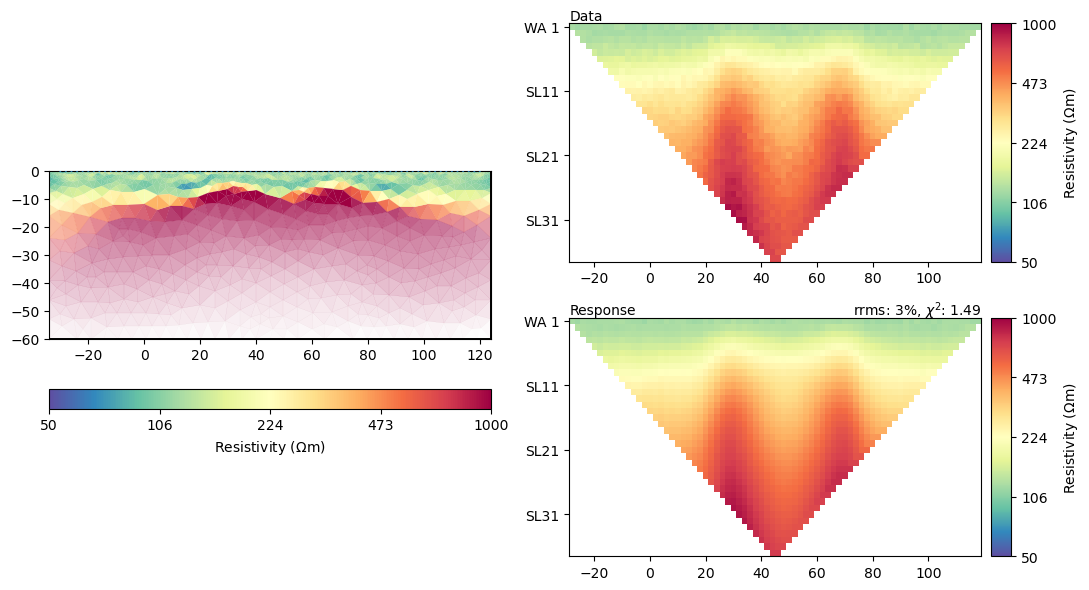

In [99]:
# Loading ERT Manager
mgr_slm = ert.ERTManager(fn_ert_slm)

# Load data
ert_data_slm = ert.load(fn_ert_slm)
#mgr_dd.showData(ert_data_slm)

# Inverting data
inv_slm = mgr_slm.invert(lam=17, zWeight=0.2, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_slm.showResultAndFit(cMin=rmin, cMax=ramax);
plt.savefig('Images/ERT_SLM_RF.png')

... of Wenner

13/01/23 - 13:12:41 - pyGIMLi - INFO - Found 2 regions.
13/01/23 - 13:12:41 - pyGIMLi - INFO - Region with smallest marker (1) set to background
13/01/23 - 13:12:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/01/23 - 13:12:41 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.
13/01/23 - 13:12:41 - pyGIMLi - INFO - Use median(data values)=293.372301074415
13/01/23 - 13:12:41 - pyGIMLi - INFO - Created startmodel from forward operator: 1748 [293.372301074415,...,293.372301074415]
13/01/23 - 13:12:41 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000264AF19A360>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000264AF49EC20>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000264AEBF9D00>
min/max (data): 115/810
min/max (error): 2.5%/2.5%
min/max (start model): 293/293
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 23.61 (dPhi = 2.26%) lam: 17
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 22.72 (dPhi = 3.91%) lam: 17.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 20.67 (dPhi = 9.12%) lam: 17.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 12.41 (dPhi = 39.41%) lam: 17.0
----------------------------------------

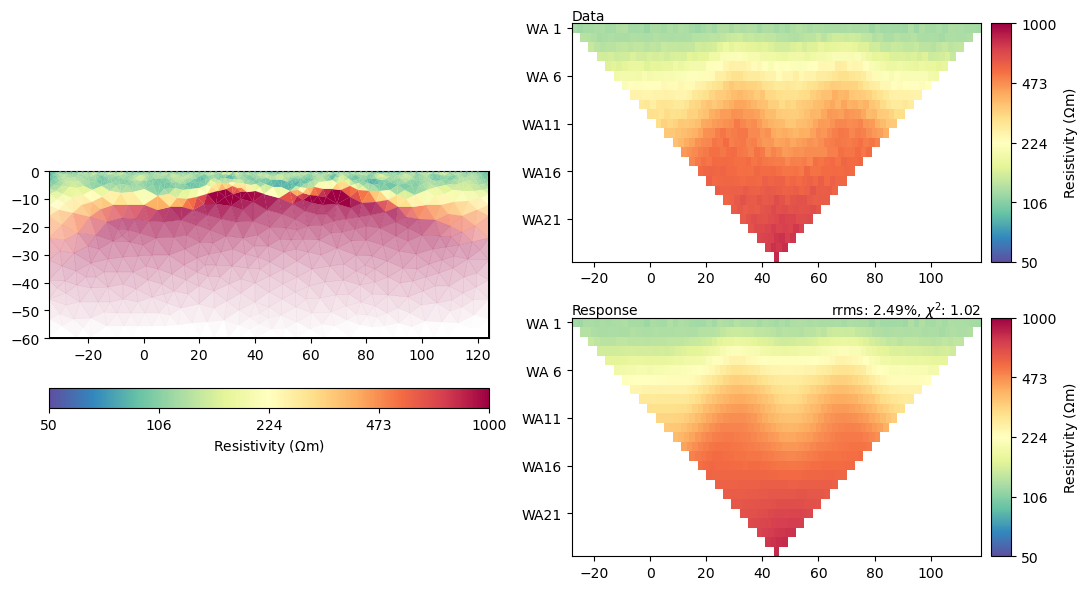

In [15]:
# Loading ERT Manager
mgr_wa = ert.ERTManager(fn_ert_wa)

# Load data
ert_data_wa = ert.load(fn_ert_wa)
#mgr_dd.showData(ert_data_wa)

# Inverting data
inv_wa = mgr_wa.invert(lam=17, zWeight=0.3, secNodes=2, paraMaxCellSize=20, verbose=True)

# Show results
mgr_wa.showResultAndFit(cMin=rmin, cMax=ramax);
plt.savefig('Images/ERT_WA_RF.png')

### ERT Comparison

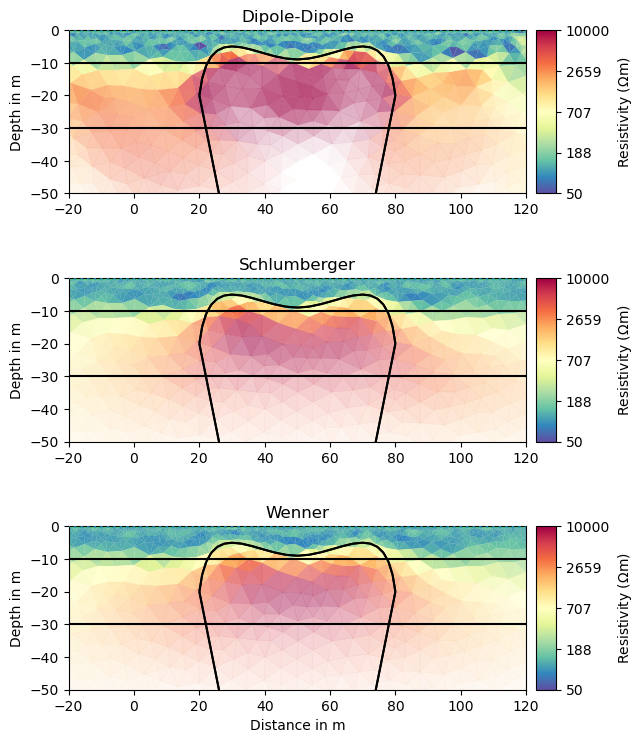

In [100]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12, 8)) 
fig.tight_layout(pad=4.0)

pg.show(geom, ax=ax1, fillRegion=False)
pg.show(geom, ax=ax2, fillRegion=False)
pg.show(geom, ax=ax3, fillRegion=False)
mgr_dd.showResult(ax=ax1, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")
mgr_slm.showResult(ax=ax2, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")
mgr_wa.showResult(ax=ax3, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")

ax1.set_xlim(-20,120)
ax2.set_xlim(-20,120)
ax3.set_xlim(-20,120)
ax1.set_ylim(-50,0)
ax2.set_ylim(-50,0)
ax3.set_ylim(-50,0)
ax1.set_ylabel('Depth in m')
ax2.set_ylabel('Depth in m')
ax3.set_ylabel('Depth in m')
ax3.set_xlabel('Distance in m')
ax1.set_title('Dipole-Dipole')
ax2.set_title('Schlumberger')
ax3.set_title('Wenner')
plt.savefig('Images/ERT_Inv_comp.png')

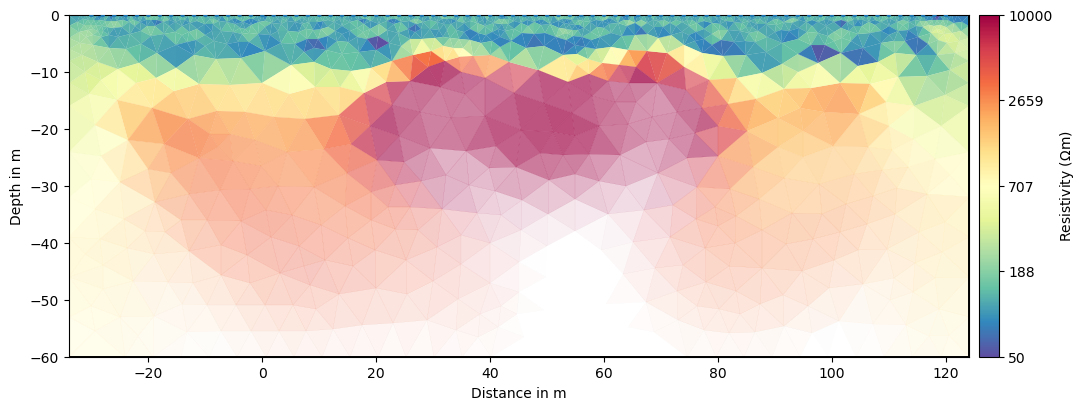

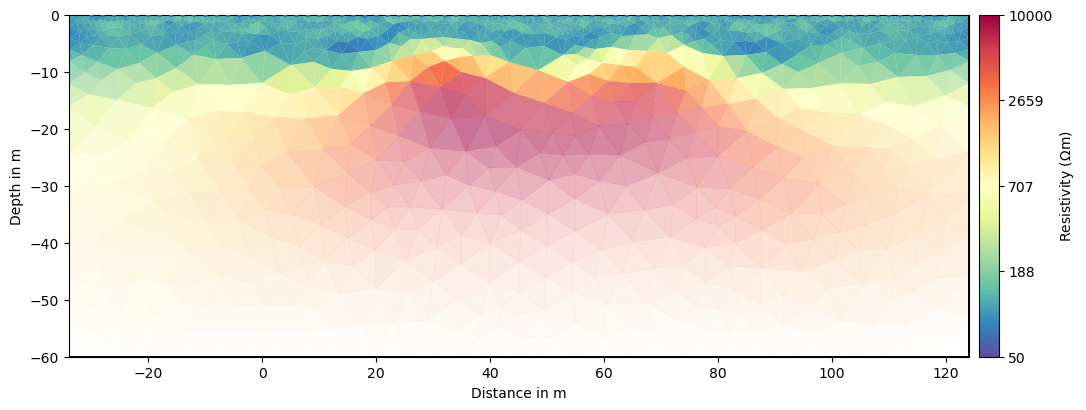

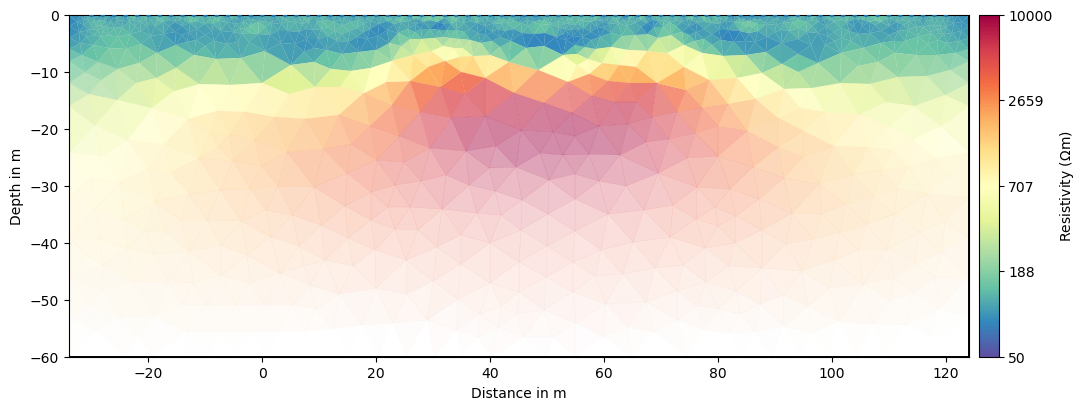

In [41]:
fig, ax = plt.subplots(figsize=(12, 8))
mgr_dd.showResult(ax=ax, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Depth in m')
plt.savefig('Images/ERT_DD_Result.png')

fig, ax = plt.subplots(figsize=(12, 8))
mgr_slm.showResult(ax=ax, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Depth in m')
plt.savefig('Images/ERT_SLM_Result.png')

fig, ax = plt.subplots(figsize=(12, 8))
mgr_wa.showResult(ax=ax, logScale=True, cMin=rmin, cMax=rmax, orientation="vertical")
ax.set_xlabel('Distance in m')
ax.set_ylabel('Depth in m')
plt.savefig('Images/ERT_WA_Result.png')

### TravelTime inversion

13/01/23 - 17:49:43 - pyGIMLi - INFO - Found 1 regions.
13/01/23 - 17:49:43 - pyGIMLi - INFO - Creating forward mesh from region infos.
13/01/23 - 17:49:43 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
13/01/23 - 17:49:43 - pyGIMLi - INFO - Create gradient starting model. 600: 2700
13/01/23 - 17:49:43 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00145537 0.00153459 0.00163719 ... 0.00037854 0.00040684 0.00037895]
13/01/23 - 17:49:43 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x00000264ED53E6D0>
Data transformation: <pgcore._pygimli_.RTrans object at 0x00000264ECE4F3B0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000264ECE4F4F0>
min/max (data): 0.0014/0.1
min/max (error): 1.96%/75.23%
min/max (start model): 3.7e-04/0.0017
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 3.67 (dPhi = 33.44%) lam: 2.5
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 2.66 (dPhi = 27.35%) lam: 2.5
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 2.1 (dPhi = 20.74%) lam: 2.5
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 1.75 (dPhi = 16.65%) lam: 2.5
------------------------------------

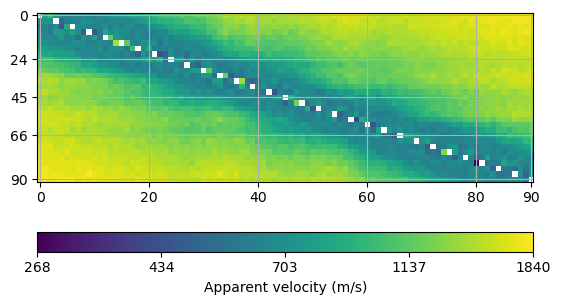

In [86]:
# Load TT Managern and data
mgr_tt = TravelTimeManager(fn_tt)
tt_data = pg.physics.traveltime.load(fn_tt)
mgr_tt.showData(tt_data)

# Invert data
vest = mgr_tt.invert(tt_data, secNodes=2, paraMaxCellSize=20, maxIter=15, verbose=True,
                  vTop=600, vBottom=2700, lam=2.5)
#np.testing.assert_array_less(mgr_tt.inv.inv.chi2(), 1.1)

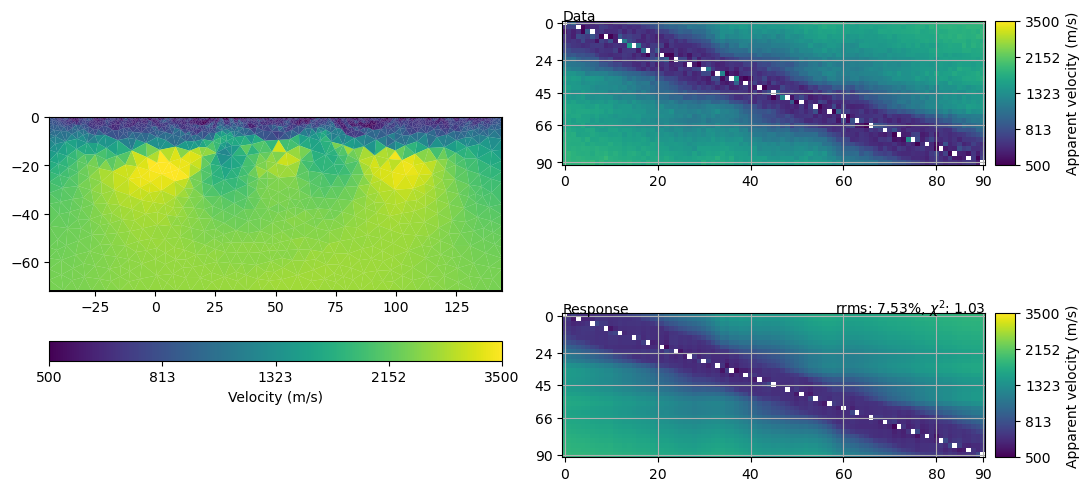

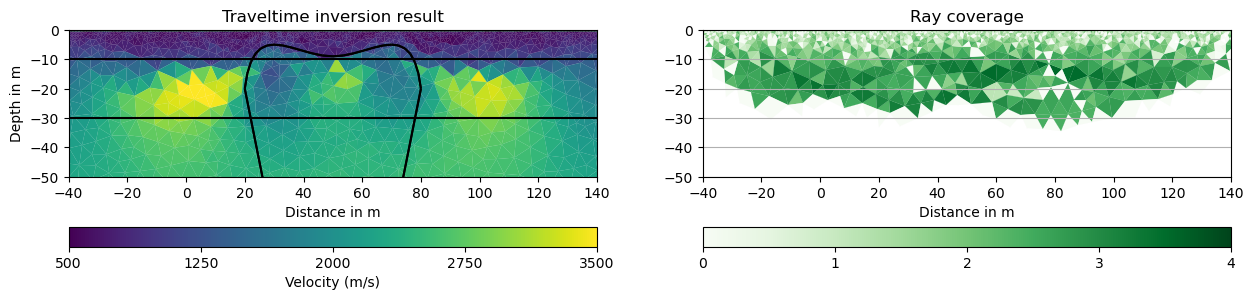

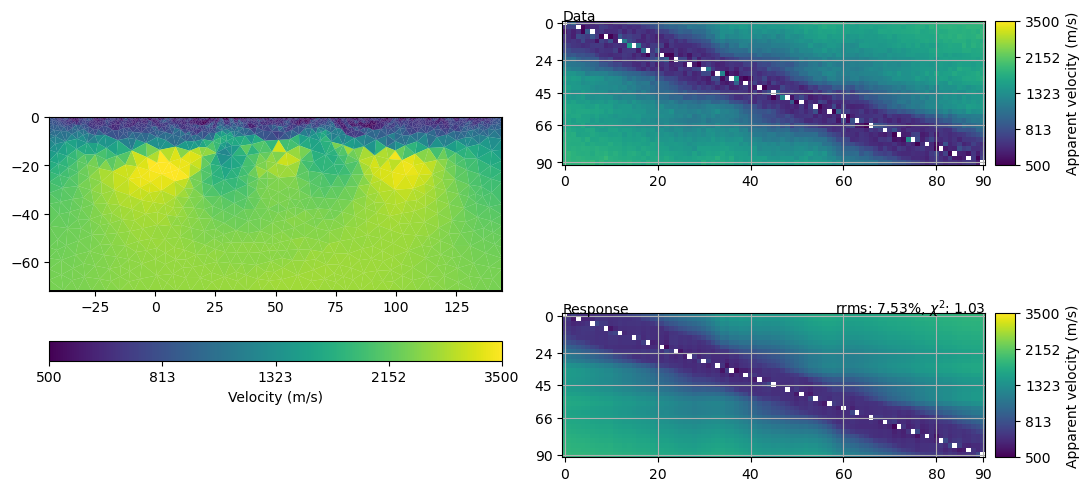

In [88]:
# Display results
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,10))
mgr_tt.showResult(logScale=False, cMin=vmin, cMax=vmax, ax=ax1)
pg.show(geom, ax=ax1, fillRegion=False, regionMarker=False)
ax1.set_xlim(-40,140)
ax1.set_ylim(-50,0)
ax1.set_title('Traveltime inversion result')
ax1.set_xlabel('Distance in m')
ax1.set_ylabel('Depth in m')

mgr_tt.showCoverage(ax=ax2, cMap="Greens", cMin=0, cMax=4, colorBar=True)
#mgr_tt.drawRayPaths(ax=ax2, color="k", alpha=0.9)
ax2.set_xlim(-40,140)
ax2.set_ylim(-50,0)
ax2.grid(axis='y')
ax2.set_title('Ray coverage')
ax2.set_xlabel('Distance in m')

plt.savefig('Images/TT_comp.png')

mgr_tt.showResultAndFit(cMin=vmin, cMax=vmax)
#plt.savefig('Images/TT_RF.png')